In [1]:
#imports
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from itertools import product
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [2]:
#import data for synop/meso overview

data_dpt2m = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/dpt.2m.2017.nc', decode_cf=True)
data_dpt2m = data_dpt2m.sel(time=slice('2017-01-21T00:00:00','2017-01-23T23:00:00'))

#u wind
data_uwnd = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/jancasestudy_uwnd.nc', decode_cf=True)

#v wind
data_vwnd = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/jancasestudy_vwnd.nc', decode_cf=True)

#geopotential height (GPH)
data_ghgt = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/jancasestudy_ghgt.nc', decode_cf=True)
#interested in 300mb geopotential height (GPH)
data_ghgt = data_ghgt.sel(level=300.)

#cape
data_cape = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/jancasestudy_cape.nc', decode_cf=True)

#get 10 m wind as approx 0m
#u wind
data_uwnd0 = xr.open_dataset('/glade/work/molina/DATA/NARR_NETCDF/uwnd.10m.2017.nc', decode_cf=True)
#v wind
data_vwnd0 = xr.open_dataset('/glade/work/molina/DATA/NARR_NETCDF/vwnd.10m.2017.nc', decode_cf=True)

/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'dpt' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  use_cftime=use_cftime,
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'uwnd' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  use_cftime=use_cftime,
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'vwnd' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  use_cftime=use_cftime,


In [3]:
#get 6 km wind
#u wind
data_uwnd6 = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/jancasestudy_uwnd.nc', decode_cf=True)
##v wind
data_vwnd6 = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/jancasestudy_vwnd.nc', decode_cf=True)

data_uwnd6 = data_uwnd6.interp(level=500.)
data_vwnd6 = data_vwnd6.interp(level=500.)

In [4]:
#create basemap projection for mapping the synoptic data.

llcrnrlon = -105
llcrnrlat = 25
urcrnrlon = -70
urcrnrlat = 42
m = Basemap(projection='lcc', lat_0 = 39, lon_0 = -96, lat_1 = 40,
            llcrnrlon = llcrnrlon, llcrnrlat = llcrnrlat,
            urcrnrlat = urcrnrlat, urcrnrlon = urcrnrlon,
            resolution='l')

#convert the lat lon values into basemap coordinates
x1, y1 = m(data_cape.coords['lon'].values, data_cape.coords['lat'].values) #note, meshgrid not needed given lat lon already in 2-D
x_raw, y_raw = data_cape.coords['lon'].values, data_cape.coords['lat'].values

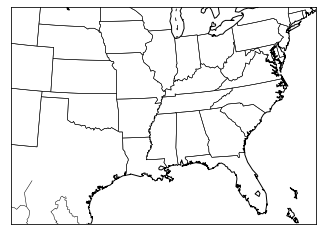

In [5]:
m.drawstates(); m.drawcoastlines(); plt.show()

In [6]:
#create a polygon to filter out data beyond the basemap region of interest
#this is to help with the labeling of contours that follows with GPH.

# the limits (corner points) of the map
xmin, xmax, ymin, ymax = m.xmin, m.xmax, m.ymin, m.ymax  #meters

# corner points (x, y) in meters of the projection
ll = (xmin, ymin)
ur = (xmax, ymax)
ul = (xmin, ymax)
lr = (xmax, ymin)

# All (lon, lat) of corner points, degrees
LL = m(*ll, inverse=True)
UR = m(*ur, inverse=True)
UR = (UR[0],UR[1]+10)
UL = m(*ul, inverse=True)
UL = (UL[0],UL[1]+10)
LR = m(*lr, inverse=True)

#the polygon
polygon = Polygon([LL, UL, UR, LR])

In [7]:
#for contouring

#select time steps of interest for plotting
first_ghgt = data_ghgt.sel(time='2017-01-21T03:00:00').hgt.values
scond_ghgt = data_ghgt.sel(time='2017-01-21T09:00:00').hgt.values
third_ghgt = data_ghgt.sel(time='2017-01-21T15:00:00').hgt.values
forth_ghgt = data_ghgt.sel(time='2017-01-21T21:00:00').hgt.values
fifth_ghgt = data_ghgt.sel(time='2017-01-22T03:00:00').hgt.values
sixth_ghgt = data_ghgt.sel(time='2017-01-22T09:00:00').hgt.values
svnth_ghgt = data_ghgt.sel(time='2017-01-22T15:00:00').hgt.values
eight_ghgt = data_ghgt.sel(time='2017-01-22T21:00:00').hgt.values
ninth_ghgt = data_ghgt.sel(time='2017-01-23T03:00:00').hgt.values


#iterate through data masking points of non-interest
for i, j in product(range(len(x1[:,0])),range(len(x1[0,:]))):
    
    y = y1[i,j]
    x = x1[i,j]
    
    #convert to degrees lat lon for comparison to polygon
    xpt, ypt = m(x,y,inverse=True)
    point = Point(xpt, ypt)
    
    if not polygon.contains(point):
        #mask the non-intersting points
        first_ghgt[i,j] = None
        scond_ghgt[i,j] = None
        third_ghgt[i,j] = None
        forth_ghgt[i,j] = None
        fifth_ghgt[i,j] = None
        sixth_ghgt[i,j] = None
        svnth_ghgt[i,j] = None
        eight_ghgt[i,j] = None
        ninth_ghgt[i,j] = None

In [8]:
def make_colormap(colors):
    #function for custom colorbar: http://depts.washington.edu/clawpack/users-4.6/claw/python/pyclaw/plotters/colormaps.py
    from matplotlib.colors import LinearSegmentedColormap, ColorConverter
    z  = np.array(sorted(colors.keys()))
    n  = len(z)
    z1 = min(z)
    zn = max(z)
    x0 = (z - z1) / (zn - z1)
    CC = ColorConverter()
    R = []
    G = []
    B = []
    for i in range(n):
        Ci = colors[z[i]]      
        if type(Ci) == str:
            RGB = CC.to_rgb(Ci)
        else:
            RGB = Ci
        R.append(RGB[0])
        G.append(RGB[1])
        B.append(RGB[2])
    cmap_dict = {}
    cmap_dict['red']   = [(x0[i],R[i],R[i]) for i in range(len(R))]
    cmap_dict['green'] = [(x0[i],G[i],G[i]) for i in range(len(G))]
    cmap_dict['blue']  = [(x0[i],B[i],B[i]) for i in range(len(B))]
    mymap = LinearSegmentedColormap('mymap',cmap_dict)
    return mymap  

import matplotlib as mpl
import matplotlib.colors as colorss

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colorss.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.cm.get_cmap('BuPu',8)
#new_cmap = truncate_colormap(new_cmap, 0.1, 1.0)

In [9]:
moist_color = ({0.:'lime',
                0.19:'lime',
                0.2:'limegreen',
                0.39:'limegreen',
                0.4:'green',
                0.59:'green',
                0.6:'darkgreen',
                0.79:'darkgreen',
                0.8:'k',
                1.0:'k'})
                
cmap2 = make_colormap(moist_color)

In [10]:
#select time periods of interest for cape and dew point
first_cape = np.copy([data_cape.sel(time='2017-01-21T03:00:00').cape.values]).squeeze()
scond_cape = np.copy([data_cape.sel(time='2017-01-21T09:00:00').cape.values]).squeeze()
third_cape = np.copy([data_cape.sel(time='2017-01-21T15:00:00').cape.values]).squeeze()
forth_cape = np.copy([data_cape.sel(time='2017-01-21T21:00:00').cape.values]).squeeze()
fifth_cape = np.copy([data_cape.sel(time='2017-01-22T03:00:00').cape.values]).squeeze()
sixth_cape = np.copy([data_cape.sel(time='2017-01-22T09:00:00').cape.values]).squeeze()
svnth_cape = np.copy([data_cape.sel(time='2017-01-22T15:00:00').cape.values]).squeeze()
eight_cape = np.copy([data_cape.sel(time='2017-01-22T21:00:00').cape.values]).squeeze()
ninth_cape = np.copy([data_cape.sel(time='2017-01-23T03:00:00').cape.values]).squeeze()

first_dpt2m = np.copy([data_dpt2m.sel(time='2017-01-21T03:00:00').dpt.values]).squeeze()
scond_dpt2m = np.copy([data_dpt2m.sel(time='2017-01-21T09:00:00').dpt.values]).squeeze()
third_dpt2m = np.copy([data_dpt2m.sel(time='2017-01-21T15:00:00').dpt.values]).squeeze()
forth_dpt2m = np.copy([data_dpt2m.sel(time='2017-01-21T21:00:00').dpt.values]).squeeze()
fifth_dpt2m = np.copy([data_dpt2m.sel(time='2017-01-22T03:00:00').dpt.values]).squeeze()
sixth_dpt2m = np.copy([data_dpt2m.sel(time='2017-01-22T09:00:00').dpt.values]).squeeze()
svnth_dpt2m = np.copy([data_dpt2m.sel(time='2017-01-22T15:00:00').dpt.values]).squeeze()
eight_dpt2m = np.copy([data_dpt2m.sel(time='2017-01-22T21:00:00').dpt.values]).squeeze()
ninth_dpt2m = np.copy([data_dpt2m.sel(time='2017-01-23T03:00:00').dpt.values]).squeeze()

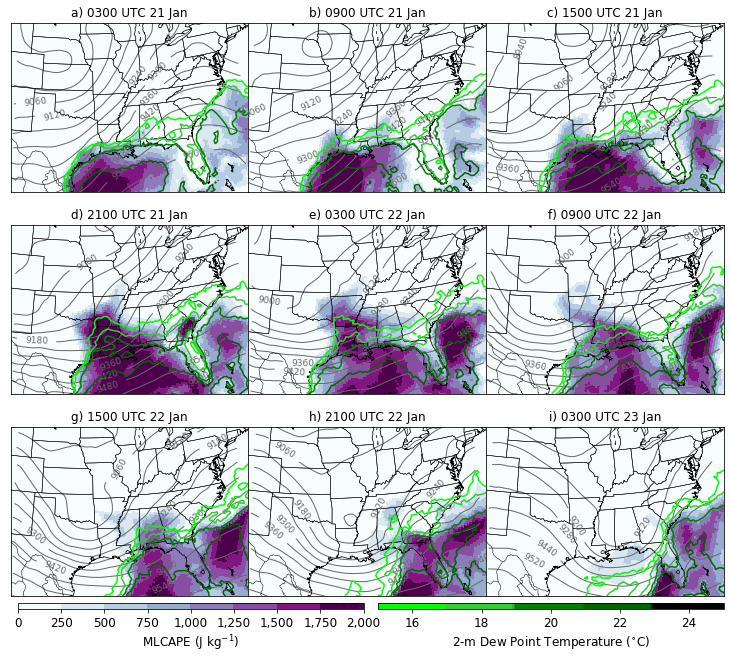

In [13]:
###############################################################################
###############################################################################
###############################################################################

fig = plt.figure(figsize=(10.,8.5))

###############################################################################

ax1 = fig.add_axes([0.0, 0.66, 0.33, 0.33])

cs = ax1.pcolormesh(x1, y1, first_cape, 
                    vmin=0, vmax=2000, cmap=cmap)

cn = ax1.contour(x1, y1, first_ghgt, 
                 12, colors='dimgrey', alpha=1.0, linewidths=1., linestyles='-')

ax1.clabel(cn, inline=1, fontsize=9, inline_spacing=-6, manual=False, fmt='%1.0f')

ct = ax1.contour(x1, y1, first_dpt2m-273.15, 
                    levels=[16,18,20,22,24], cmap=cmap2, zorder=10)


"""
u_wind, v_wind, x_wind, y_wind = m.rotate_vector(
    data_uwnd6.sel(time='2017-01-21T03:00:00').uwnd.values - data_uwnd0.sel(time='2017-01-21T03:00:00').uwnd.values,                                              
    data_vwnd6.sel(time='2017-01-21T03:00:00').vwnd.values - data_vwnd0.sel(time='2017-01-21T03:00:00').vwnd.values,
                                                 x_raw,
                                                 y_raw,
                                                 returnxy=True)
Q = ax1.quiver(x_wind[::5, 1::5], y_wind[::5, 1::5], 
               u_wind[::5, 1::5], v_wind[::5, 1::5],
               color = 'k',
               angles='xy', scale_units='xy', scale=0.00025)
"""

m.drawcoastlines(color='k',linewidth=0.75)
m.drawstates(color='k')
m.drawcountries(color='k')
ax1.set_title(u'a) 0300 UTC 21 Jan', fontsize=12, loc='center')

###############################################################################
    
ax2 = fig.add_axes([0.33, 0.66, 0.33, 0.33])

ax2.pcolormesh(x1, y1, scond_cape, 
                    vmin=0, vmax=2000, cmap=cmap)

cn = ax2.contour(x1, y1, scond_ghgt, 
                 12, colors='dimgrey', alpha=1.0, linewidths=1., linestyles='-')

ax2.clabel(cn, inline=1, fontsize=9, inline_spacing=-6, manual=False, fmt='%1.0f')

ax2.contour(x1, y1, scond_dpt2m-273.15, 
                    levels=[16,18,20,22,24], cmap=cmap2, zorder=10)

"""
u_wind, v_wind, x_wind, y_wind = m.rotate_vector(
    data_uwnd6.sel(time='2017-01-21T09:00:00').uwnd.values - data_uwnd0.sel(time='2017-01-21T09:00:00').uwnd.values,                                              
    data_vwnd6.sel(time='2017-01-21T09:00:00').vwnd.values - data_vwnd0.sel(time='2017-01-21T09:00:00').vwnd.values,
                                                 x_raw,
                                                 y_raw,
                                                 returnxy=True)
Q = ax2.quiver(x_wind[::5, 1::5], y_wind[::5, 1::5], 
               u_wind[::5, 1::5], v_wind[::5, 1::5],
               color = 'k',
               angles='xy', scale_units='xy', scale=0.00025)
"""

m.drawcoastlines(color='k',linewidth=0.75)
m.drawstates(color='k')
m.drawcountries(color='k')
ax2.set_title(u'b) 0900 UTC 21 Jan', fontsize=12, loc='center')

###############################################################################

ax3 = fig.add_axes([0.66, 0.66, 0.33, 0.33])

ax3.pcolormesh(x1, y1, third_cape, 
                    vmin=0, vmax=2000, cmap=cmap)

cn = ax3.contour(x1, y1, third_ghgt, 
                 12, colors='dimgrey', alpha=1.0, linewidths=1., linestyles='-')

ax3.clabel(cn, inline=1, fontsize=9, inline_spacing=-6, manual=False, fmt='%1.0f')

ax3.contour(x1, y1, third_dpt2m-273.15, 
                    levels=[16,18,20,22,24], cmap=cmap2, zorder=10)

"""
u_wind, v_wind, x_wind, y_wind = m.rotate_vector(
    data_uwnd6.sel(time='2017-01-21T15:00:00').uwnd.values - data_uwnd0.sel(time='2017-01-21T15:00:00').uwnd.values,                                              
    data_vwnd6.sel(time='2017-01-21T15:00:00').vwnd.values - data_vwnd0.sel(time='2017-01-21T15:00:00').vwnd.values,
                                                 x_raw,
                                                 y_raw,
                                                 returnxy=True)
Q = ax3.quiver(x_wind[::5, 1::5], y_wind[::5, 1::5], 
               u_wind[::5, 1::5], v_wind[::5, 1::5],
               color = 'k',
               angles='xy', scale_units='xy', scale=0.00025)
"""

m.drawcoastlines(color='k',linewidth=0.75)
m.drawstates(color='k')
m.drawcountries(color='k')
ax3.set_title(u'c) 1500 UTC 21 Jan', fontsize=12, loc='center')

###############################################################################

ax4 = fig.add_axes([0.0, 0.33, 0.33, 0.33])

ax4.pcolormesh(x1, y1, forth_cape, 
                    vmin=0, vmax=2000, cmap=cmap)

cn = ax4.contour(x1, y1, forth_ghgt, 
                 12, colors='dimgrey', alpha=1.0, linewidths=1., linestyles='-')

ax4.clabel(cn, inline=1, fontsize=9, inline_spacing=-6, manual=False, fmt='%1.0f')

ax4.contour(x1, y1, forth_dpt2m-273.15, 
                    levels=[16,18,20,22,24], cmap=cmap2, zorder=10)

"""
u_wind, v_wind, x_wind, y_wind = m.rotate_vector(
    data_uwnd6.sel(time='2017-01-21T21:00:00').uwnd.values - data_uwnd0.sel(time='2017-01-21T21:00:00').uwnd.values,                                              
    data_vwnd6.sel(time='2017-01-21T21:00:00').vwnd.values - data_vwnd0.sel(time='2017-01-21T21:00:00').vwnd.values,
                                                 x_raw,
                                                 y_raw,
                                                 returnxy=True)
Q = ax4.quiver(x_wind[::5, 1::5], y_wind[::5, 1::5], 
               u_wind[::5, 1::5], v_wind[::5, 1::5],
               color = 'k',
               angles='xy', scale_units='xy', scale=0.00025)
"""

m.drawcoastlines(color='k',linewidth=0.75)
m.drawstates(color='k')
m.drawcountries(color='k')

ax4.set_title(u'd) 2100 UTC 21 Jan', fontsize=12, loc='center')

###############################################################################
    
ax5 = fig.add_axes([0.33, 0.33, 0.33, 0.33])

ax5.pcolormesh(x1, y1, fifth_cape, 
                    vmin=0, vmax=2000, cmap=cmap)

cn = ax5.contour(x1, y1, fifth_ghgt, 
                 12, colors='dimgrey', alpha=1.0, linewidths=1., linestyles='-')

ax5.clabel(cn, inline=1, fontsize=9, inline_spacing=-6, manual=False, fmt='%1.0f')

ax5.contour(x1, y1, fifth_dpt2m-273.15, 
                    levels=[16,18,20,22,24], cmap=cmap2, zorder=10)

"""
u_wind, v_wind, x_wind, y_wind = m.rotate_vector(
    data_uwnd6.sel(time='2017-01-22T03:00:00').uwnd.values - data_uwnd0.sel(time='2017-01-22T03:00:00').uwnd.values,                                              
    data_vwnd6.sel(time='2017-01-22T03:00:00').vwnd.values - data_vwnd0.sel(time='2017-01-22T03:00:00').vwnd.values,
                                                 x_raw,
                                                 y_raw,
                                                 returnxy=True)
Q = ax5.quiver(x_wind[::5, 1::5], y_wind[::5, 1::5], 
               u_wind[::5, 1::5], v_wind[::5, 1::5],
               color = 'k',
               angles='xy', scale_units='xy', scale=0.00025)
"""

m.drawcoastlines(color='k',linewidth=0.75)
m.drawstates(color='k')
m.drawcountries(color='k')
ax5.set_title(u'e) 0300 UTC 22 Jan', fontsize=12, loc='center')  

###############################################################################
    
ax6 = fig.add_axes([0.66, 0.33, 0.33, 0.33])

ax6.pcolormesh(x1, y1, sixth_cape, 
                    vmin=0, vmax=2000, cmap=cmap)

cn = ax6.contour(x1, y1, sixth_ghgt, 
                 12, colors='dimgrey', alpha=1.0, linewidths=1., linestyles='-')

ax6.clabel(cn, inline=1, fontsize=9, inline_spacing=-6, manual=False, fmt='%1.0f')

ax6.contour(x1, y1, sixth_dpt2m-273.15, 
                    levels=[16,18,20,22,24], cmap=cmap2, zorder=10)

"""
u_wind, v_wind, x_wind, y_wind = m.rotate_vector(
    data_uwnd6.sel(time='2017-01-22T09:00:00').uwnd.values - data_uwnd0.sel(time='2017-01-22T09:00:00').uwnd.values,                                              
    data_vwnd6.sel(time='2017-01-22T09:00:00').vwnd.values - data_vwnd0.sel(time='2017-01-22T09:00:00').vwnd.values,
                                                 x_raw,
                                                 y_raw,
                                                 returnxy=True)
Q = ax6.quiver(x_wind[::5, 1::5], y_wind[::5, 1::5], 
               u_wind[::5, 1::5], v_wind[::5, 1::5],
               color = 'k',
               angles='xy', scale_units='xy', scale=0.00025)
"""

m.drawcoastlines(color='k',linewidth=0.75)
m.drawstates(color='k')
m.drawcountries(color='k')
ax6.set_title(u'f) 0900 UTC 22 Jan', fontsize=12, loc='center')

###############################################################################


ax7 = fig.add_axes([0.00, 0.0, 0.33, 0.33])

ax7.pcolormesh(x1, y1, svnth_cape, 
                    vmin=0, vmax=2000, cmap=cmap)

cn = ax7.contour(x1, y1, svnth_ghgt, 
                 12, colors='dimgrey', alpha=1.0, linewidths=1., linestyles='-')

ax7.clabel(cn, inline=1, fontsize=9, inline_spacing=-6, manual=False, fmt='%1.0f')

ax7.contour(x1, y1, svnth_dpt2m-273.15, 
                    levels=[16,18,20,22,24], cmap=cmap2, zorder=10)

"""
u_wind, v_wind, x_wind, y_wind = m.rotate_vector(
    data_uwnd6.sel(time='2017-01-22T15:00:00').uwnd.values - data_uwnd0.sel(time='2017-01-22T15:00:00').uwnd.values,                                              
    data_vwnd6.sel(time='2017-01-22T15:00:00').vwnd.values - data_vwnd0.sel(time='2017-01-22T15:00:00').vwnd.values,
                                                 x_raw,
                                                 y_raw,
                                                 returnxy=True)
Q = ax7.quiver(x_wind[::5, 1::5], y_wind[::5, 1::5], 
               u_wind[::5, 1::5], v_wind[::5, 1::5],
               color = 'k',
               angles='xy', scale_units='xy', scale=0.00025)
"""

m.drawcoastlines(color='k',linewidth=0.75)
m.drawstates(color='k')
m.drawcountries(color='k')
ax7.set_title(u'g) 1500 UTC 22 Jan', fontsize=12, loc='center')


###############################################################################


ax8 = fig.add_axes([0.33, 0.0, 0.33, 0.33])

ax8.pcolormesh(x1, y1, eight_cape, 
                    vmin=0, vmax=2000, cmap=cmap)

cn = ax8.contour(x1, y1, eight_ghgt, 
                 12, colors='dimgrey', alpha=1.0, linewidths=1., linestyles='-')

ax8.clabel(cn, inline=1, fontsize=9, inline_spacing=-6, manual=False, fmt='%1.0f')

ax8.contour(x1, y1, eight_dpt2m-273.15, 
                    levels=[16,18,20,22,24], cmap=cmap2, zorder=10)

"""
u_wind, v_wind, x_wind, y_wind = m.rotate_vector(
    data_uwnd6.sel(time='2017-01-22T21:00:00').uwnd.values - data_uwnd0.sel(time='2017-01-22T21:00:00').uwnd.values,                                              
    data_vwnd6.sel(time='2017-01-22T21:00:00').vwnd.values - data_vwnd0.sel(time='2017-01-22T21:00:00').vwnd.values,
                                                 x_raw,
                                                 y_raw,
                                                 returnxy=True)
Q = ax8.quiver(x_wind[::5, 1::5], y_wind[::5, 1::5], 
               u_wind[::5, 1::5], v_wind[::5, 1::5],
               color = 'k',
               angles='xy', scale_units='xy', scale=0.00025)
"""

m.drawcoastlines(color='k',linewidth=0.75)
m.drawstates(color='k')
m.drawcountries(color='k')
ax8.set_title(u'h) 2100 UTC 22 Jan', fontsize=12, loc='center')


###############################################################################


ax9 = fig.add_axes([0.66, 0.0, 0.33, 0.33])

ax9.pcolormesh(x1, y1, ninth_cape, 
                    vmin=0, vmax=2000, cmap=cmap)

cn = ax9.contour(x1, y1, ninth_ghgt, 
                 12, colors='dimgrey', alpha=1.0, linewidths=1., linestyles='-')

ax9.clabel(cn, inline=1, fontsize=9, inline_spacing=-6, manual=False, fmt='%1.0f')

ax9.contour(x1, y1, ninth_dpt2m-273.15, 
                    levels=[16,18,20,22,24], cmap=cmap2, zorder=10)

"""
u_wind, v_wind, x_wind, y_wind = m.rotate_vector(
    data_uwnd6.sel(time='2017-01-23T03:00:00').uwnd.values - data_uwnd0.sel(time='2017-01-23T03:00:00').uwnd.values,                                              
    data_vwnd6.sel(time='2017-01-23T03:00:00').vwnd.values - data_vwnd0.sel(time='2017-01-23T03:00:00').vwnd.values,
                                                 x_raw,
                                                 y_raw,
                                                 returnxy=True)
Q = ax9.quiver(x_wind[::5, 1::5], y_wind[::5, 1::5], 
               u_wind[::5, 1::5], v_wind[::5, 1::5],
               color = 'k',
               angles='xy', scale_units='xy', scale=0.00025)
"""

m.drawcoastlines(color='k',linewidth=0.75)
m.drawstates(color='k')
m.drawcountries(color='k')
ax9.set_title(u'i) 0300 UTC 23 Jan', fontsize=12, loc='center')


###############################################################################

import matplotlib as mpl


#plot cape colorbar
cbar_ax = fig.add_axes([0.01, 0.005, 0.48, 0.01])
norm = mpl.colors.Normalize(vmin=0, vmax=8)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap,
                                norm=norm,
                                orientation='horizontal', 
                                ticks=[0,1,2,3,4,5,6,7,8])
labels = np.array([0,1,2,3,4,5,6,7,8])
loc    = labels
tick_1 = ['0','250','500','750','1,000','1,250','1,500','1,750','2,000']
cb1.set_ticks(loc)
cb1.ax.set_xticklabels(tick_1)
cb1.ax.tick_params(labelsize=12)
cb1.set_label('MLCAPE (J $\mathregular{kg^{-1}}$)', fontsize=12) 



#plot dpt colorbar
cbar_ax = fig.add_axes([0.51, 0.005, 0.48, 0.01])
norm = mpl.colors.Normalize(vmin=0, vmax=5)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap2,
                                norm=norm,
                                orientation='horizontal', 
                               ticks=[0,1,2,3,4,5])
labels = np.array([0,1,2,3,4,5])
loc    = labels + .5
tick_1 = ['16','18','20','22','24']
cb1.set_ticks(loc)
cb1.ax.set_xticklabels(tick_1)
cb1.ax.tick_params(labelsize=12)

cb1.set_label('2-m Dew Point Temperature ($^{\circ}$C)', fontsize=12) 


"""
#the little arrow
q_key = plt.quiverkey(Q, 0.95, 0.98, 5., 
                      label=r'$5 \frac{m}{s}$', labelpos='E',coordinates='figure',
                      color='k', zorder=99, fontproperties={'weight': 'bold', 'size':12})
"""

###############################################################################
###############################################################################
###############################################################################


plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig3.png', bbox_inches='tight', dpi=1200)
plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig3_lowdpi.png', bbox_inches='tight', dpi=200)
plt.show()
plt.close()


###############################################################################
###############################################################################
###############################################################################